In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
english_stemmer=nltk.stem.SnowballStemmer('english')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/student/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
uncleaned_data = pd.read_excel('/Users/student/Desktop/2021170/chatgpt1.xlsx')
uncleaned_data.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297250048,Bow down to chatGPT ðŸ«¡..... https://t.co/ENT...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297250048,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570112,"Profilinde vatan, TÃ¼rkiye falan yazan bireyle...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570112,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [6]:
uncleaned_data.tail()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
49996,2023-01-24 06:57:56+00:00,1617778712082089984,"#ChatGPT ist ein #Chatbot, der durch kÃ¼nstlic...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082089984,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1617778726393240064,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586700032,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1617778728481989888,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481989888,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1617778731678040064,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678040064,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0
50000,2023-01-24 06:58:01+00:00,1617778733355790080,Ahora sueÃ±o con el dÃ­a en que Amazon integre...,AmericoSD_69,https://twitter.com/AmericoSD_69/status/161777...,https://twitter.com/AmericoSD_69,NaN,NaN,0,0,0,0,1617778733355790080,es,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,[],0


In [8]:
uncleaned_data.isnull().sum()

Datetime              0
Tweet Id              0
Text                  5
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

In [9]:
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            49996 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

In [35]:
aa = uncleaned_data.copy()

In [104]:
aa.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,0,1617171380306319872,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,0,1617172498822439936,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,0,1617175299195830016,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1


In [37]:
import re
import string
def clean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return text

In [103]:
aa['Text']= aa['Text'].apply(clean)
aa.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,0,1617171380306319872,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,0,1617172498822439936,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,0,1617175299195830016,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1


In [44]:
stop_words = set(stopwords.words('english'))

In [50]:
text = aa['Text']

In [99]:
from nltk.tokenize import word_tokenize
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word.casefold() not in stop_words]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

aa['Text'] = aa['Text'].apply(remove_stop_words)
aa.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,0,1617171380306319872,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,0,1617172498822439936,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,0,1617175299195830016,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1


In [56]:
final = aa.copy()

In [59]:
freq_cleaned = pd.Series(' '.join(final['Text']).split()).value_counts()[:20] # for top 20
freq_cleaned

https      97
co         97
ChatGPT    45
de         13
AI         12
la          8
OpenAI      6
que         5
like        5
use         4
con         4
del         4
el          4
chatgpt     4
multi       4
n           4
help        3
used        3
le          3
les         3
dtype: int64

In [102]:
from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

final['subjectivity'] = final['Text'].apply(get_subjectivity)
final['polarity'] = final['Text'].apply(get_polarity)
final.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,subjectivity,polarity,Analysis
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,0.500,0.136364,Positive
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,...,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0,0.000,0.000000,Neutral
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,...,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0,0.000,0.000000,Neutral
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,...,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4,0.000,0.000000,Neutral
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,...,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1,0.525,0.425000,Positive


In [75]:
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

final['Analysis'] = final['polarity'].apply(getanalysis) 
final.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,subjectivity,polarity,Analysis
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,0.500,0.136364,Positive
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,...,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0,0.000,0.000000,Neutral
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,...,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0,0.000,0.000000,Neutral
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,...,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4,0.000,0.000000,Neutral
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,...,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1,0.525,0.425000,Positive


In [70]:
final['Analysis']

2        Positive
392       Neutral
1120      Neutral
1209      Neutral
1424     Positive
4802     Positive
4852      Neutral
5304      Neutral
5369     Positive
8066     Negative
9622     Positive
10907    Positive
11405    Positive
13818    Positive
16118     Neutral
18025     Neutral
18668    Negative
19239    Positive
20244    Positive
21958    Positive
24426     Neutral
24536     Neutral
26207     Neutral
26552     Neutral
27779     Neutral
28655     Neutral
29053    Positive
29636    Positive
30570    Negative
31181     Neutral
33281    Negative
33590     Neutral
34569     Neutral
35671    Positive
36085     Neutral
37147    Positive
39039     Neutral
39331     Neutral
40830    Positive
42689     Neutral
43480    Negative
44554    Positive
46911     Neutral
48135    Negative
Name: Analysis, dtype: object

In [74]:
positive_tweets = final[final['Analysis'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,subjectivity,polarity,Analysis
40830,2023-01-23 23:12:01+00:00,1617661459915500032,LaVeritaWeb Le leggi truffa di quelle brave cl...,FigliContesi_21,https://twitter.com/FigliContesi_21/status/161...,https://twitter.com/FigliContesi_21,['https://twitter.com/AibiNews/status/16150016...,['https://t.co/7av3g70ePC'],0,0,...,it,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/AibiNews/status/1615001606...,"[User(username='LaVeritaWeb', id=9007662652451...","['#QuoteRosa', '#Femminismo', '#ONLUS', '#Bibb...",6,1.000,0.80,Positive
9622,2023-01-22 23:29:06+00:00,1617303370552999936,fun brianwhelton ask ChatGPT Impressive https ...,lain_bof,https://twitter.com/lain_bof/status/1617303370...,https://twitter.com/lain_bof,['https://twitter.com/brianwhelton/status/1616...,['https://t.co/IERuT1XdLE'],1,0,...,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/brianwhelton/status/161677...,"[User(username='brianwhelton', id=191976685, d...",[],0,0.600,0.65,Positive
11405,2023-01-23 01:34:14+00:00,1617334863513910016,Leveraging msexcel amp ChatGPT latest Microsof...,MrCoachK15,https://twitter.com/MrCoachK15/status/16173348...,https://twitter.com/MrCoachK15,"['http://flip.com/80273d98', 'https://twitter....","['https://t.co/NhfrpmqmCP', 'https://t.co/irsC...",1,3,...,en,"<a href=""http://twitter.com/download/iphone"" r...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,https://twitter.com/MrCoachK15/status/16074399...,"[User(username='msexcel', id=15934026, display...","['#ChatGPT', '#appsmash!']",2,0.900,0.50,Positive
13818,2023-01-23 04:22:11+00:00,1617377126696760064,using ChatGPT lot Google mind typos Love ChatG...,AgirlwhosNO_ONE,https://twitter.com/AgirlwhosNO_ONE/status/161...,https://twitter.com/AgirlwhosNO_ONE,['https://twitter.com/rainmaker1973/status/161...,['https://t.co/wqi0ZNahW5'],0,0,...,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/Rainmaker1973/status/16171...,"[User(username='ChatGPTGoneWild', id=159857810...",[],0,0.600,0.50,Positive
37147,2023-01-23 20:31:50+00:00,1617621150141659904,Insightful Sabine interesting ChatGPT UseCase ...,Kempton,https://twitter.com/Kempton/status/16176211501...,https://twitter.com/Kempton,['https://twitter.com/skdh/status/161754966914...,['https://t.co/DiKxyeErJY'],0,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/skdh/status/16175496691433...,"[User(username='GaryMarcus', id=232294292, dis...","['#Insightful', '#ChatGPT', '#UseCase', '#Scie...",5,0.575,0.45,Positive


In [77]:
negative_tweets = final[final['Analysis'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,subjectivity,polarity,Analysis
18668,2023-01-23 09:21:03+00:00,1617452338846769920,Estamos en medio de otra revoluci n tecnol gic...,AldoLema_uy,https://twitter.com/AldoLema_uy/status/1617452...,https://twitter.com/AldoLema_uy,['https://www.elpais.com.uy/economia-y-mercado...,"['https://t.co/Bq5dlp83Th', 'https://t.co/X96X...",3,2,...,es,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/AldoLema_uy/status/1616445...,"[User(username='elpaisuy', id=31459537, displa...",['#EconomÃ­aYMercado'],1,1.000000,-0.600000,Negative
30570,2023-01-23 16:47:37+00:00,1617564725004630016,leaning hard high tech AI machine learning stu...,GolfSpyMPR,https://twitter.com/GolfSpyMPR/status/16175647...,https://twitter.com/GolfSpyMPR,['https://twitter.com/GolfSpyMPR/status/161688...,['https://t.co/a5P6UtH4CT'],1,0,...,en,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/GolfSpyMPR/status/16168888...,"[User(username='TheStackSystem', id=1242507902...",[],0,0.555928,-0.076951,Negative
33281,2023-01-23 18:12:18+00:00,1617586034526799872,Sorry Miles ChatGPT disagrees familiar w L1 ca...,buxdabomb,https://twitter.com/buxdabomb/status/161758603...,https://twitter.com/buxdabomb,['https://twitter.com/milesdeutscher/status/16...,['https://t.co/BjSMbYr19h'],0,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/milesdeutscher/status/1617...,"[User(username='Algorand', id=9279098320022773...",['#Algorand?'],1,0.750000,-0.062500,Negative
43480,2023-01-24 01:33:51+00:00,1617697154340120064,major problem ChatGPT cite sources composed ou...,gracielagon,https://twitter.com/gracielagon/status/1617697...,https://twitter.com/gracielagon,['https://twitter.com/ProfNoahGian/status/1617...,['https://t.co/QotcjnrLGd'],1,1,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ProfNoahGian/status/161727...,"[User(username='ChatGPT', id=15981842566262988...",[],0,0.466667,-0.052083,Negative
48135,2023-01-24 05:26:38+00:00,1617755736679020032,Max supply changeable without consensus seems ...,kie_v7,https://twitter.com/kie_v7/status/161775573667...,https://twitter.com/kie_v7,['https://github.com/bitcoin/bitcoin/blob/a622...,"['https://t.co/L93bZr9VTj', 'https://t.co/cMpb...",0,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/danheld/status/16161121428...,"[User(username='OpenAI', id=4398626122, displa...",[],0,0.416667,-0.033333,Negative


In [202]:
#Get % of positive, negative, neutral tweets
print("% of positive tweets:", round((positive_tweets.shape[0]/final.shape[0])*100, 1))
print("% of negative tweets:", round((negative_tweets.shape[0]/final.shape[0])*100, 1))

% of positive tweets: 38.6
% of negative tweets: 13.6


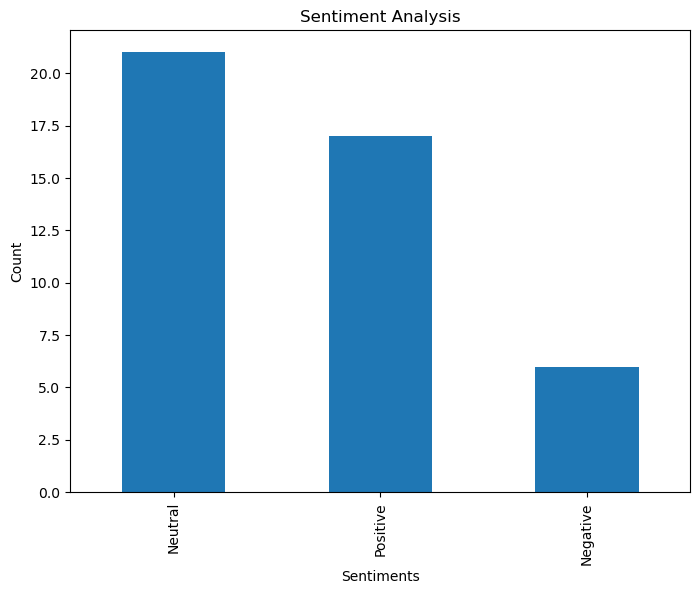

In [203]:
plt.figure(figsize=(8,6))
final['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

# TASK 2

In [94]:
final.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,subjectivity,polarity,Analysis
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,0.500,0.136364,Positive
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,...,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0,0.000,0.000000,Neutral
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,...,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0,0.000,0.000000,Neutral
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,...,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4,0.000,0.000000,Neutral
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,...,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1,0.525,0.425000,Positive


In [97]:
X = aa['Text']
y = aa['Username']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Classification Report:
                 precision    recall  f1-score   support

    ChatGPT2049       0.00      0.00      0.00         0
ConnectingODots       0.00      0.00      0.00         1
     MrCoachK15       0.00      0.00      0.00         1
        TostiOk       0.00      0.00      0.00         1
         films7       0.00      0.00      0.00         1
    gracielagon       0.00      0.00      0.00         1
    gregors_mac       0.00      0.00      0.00         0
         hcingh       0.00      0.00      0.00         1
    mjcavaretta       0.00      0.00      0.00         1
       muuficom       0.00      0.00      0.00         0
     rorotrader       0.00      0.00      0.00         1
           yova       1.00      1.00      1.00         1

       accuracy                           0.11         9
      macro avg       0.08      0.08      0.08         9
   weighted avg       0.11      0.11      0.11         9

Accuracy: 0.11


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/student/anaconda3/lib/pyth

# Task 3

In [100]:
aa.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,0,1617171380306319872,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,0,1617172498822439936,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,0,1617175299195830016,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1


In [135]:
def cleanhastags(a):
    a = re.sub(r'#', '', a).strip().replace(' ', '')
    return a

In [159]:
final['hashtag'] = final['hashtag'].apply(cleanhastags)
final.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,subjectivity,polarity,Analysis
2,2023-01-22 13:44:44+00:00,1617156308926340096,Schaut Euch fobizz DianaKnodel alles auf die P...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['ChatGPT'],1,0.500,0.136364,Positive
392,2023-01-22 14:08:23+00:00,1617162263273600000,OpenAI ChatGPT https co MlMO00Vg8A https co T6...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,...,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0,0.000,0.000000,Neutral
1120,2023-01-22 14:44:37+00:00,1617171380306319872,Mieux que la chatgpt le chat CGT dit les Terme...,gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,...,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0,0.000,0.000000,Neutral
1209,2023-01-22 14:49:03+00:00,1617172498822439936,RT ForbesTech Generative AI ChatGPT Going Ever...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,...,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['weatherguy','forbesTech','technology','donca...",4,0.000,0.000000,Neutral
1424,2023-01-22 15:00:11+00:00,1617175299195830016,BREAKTHROUGH GM implications ChatGPT close com...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,...,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['MaryLed'],1,0.525,0.425000,Positive


In [164]:
#splitting data
from sklearn.model_selection import train_test_split

X = final[['Text']]
y = final['hashtag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
X = final[['Text']]
y = final['hashtag']


text_vectorizer = TfidfVectorizer()
text_features = text_vectorizer.fit_transform(X)

scaler = StandardScaler()
scaled_text_features = scaler.fit_transform(text_features.toarray())

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_text_features)
cluster_labels = kmeans.labels_
data['cluster_label'] = cluster_labels
print(data['cluster_label'].value_counts())

ValueError: n_samples=1 should be >= n_clusters=5.

# TASK 4

In [240]:
X = final[['Text']] 
y = final[['RetweetCount']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

text_vectorizer = TfidfVectorizer()
categorical_features = ['Text']

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_vectorizer, 'Text'),  #transform the 'Text' column using TFIDF 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.transform(X_test)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_preprocessed, y_train)

y_pred = rf.predict(X_test_preprocessed)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score (R2): {r2}")

Mean Squared Error (MSE): 2.6800000000000006
Mean Absolute Error (MAE): 1.2355555555555557
R-squared Score (R2): -0.27694117647058847


/var/folders/j7/xz7znj494qq3jt1cwnh0sh3w0000gn/T/ipykernel_1573/1991622018.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_preprocessed, y_train)


# Task 5

In [233]:
hashtags_list = final['hashtag'].sum()
hashtags_count = pd.Series(hashtags_list).value_counts()
hashtags_count

['ChatGPT'][][]['weatherguy','forbesTech','technology','doncasterisgreat']['MaryLed'][]['ChatGPT','Sparrow,']['algoritmo']['LLM','chatgpt','ai','datascience','machinelearning'][][][]['ChatGPT','appsmash!'][][]['PineapplePepper']['EconomÃ­aYMercado']['ensdomain','ens','ETH','chatgpt','domain']['ChatGPT'][]['ChatGPT','3D','ChatGPT','chatgpt3','3Danimation','animation','3danimationtutorial','blendercommunity','blenderrender','blenderart']['ChatGPT','ChatGPT','GPT3-powered'][]['ChatGPT','aftereffects','geolayers','openai','gis','gischat','geospatial'][]['Politique','IA','AI','ChatGPT','OpenAIChatGPT,'][]['ChatGPT','AI'][][]['Algorand?'][]['ChatGPT']['OffByOne','DidYouNeedThatFinger']['weatherguy','forbesTech','technology','doncasterisgreat']['Insightful','ChatGPT','UseCase','ScienceInProgress','TopExpert,']['Time','gas','moneytime','Quran','wwfc','ebony','IranRevolution','oriele','afc','lufc','ChatGPT','CFC','BTC','nolimits','MondayMotivation'][]['QuoteRosa','Femminismo','ONLUS','Bibbiano'

In [247]:
from sklearn.feature_extraction.text import CountVectorizer

hashtags = final['hashtag']
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)
X = vectorizer.fit_transform(hashtags)
feature_names = vectorizer.get_feature_names()
hashtag_frequencies = X.sum(axis=0)
frequencies = [(tag, frequency) for tag, frequency in zip(feature_names, hashtag_frequencies.tolist()[0])]
co_occurrence_matrix = X.T.dot(X)
print("Hashtag Frequencies:")
for tag, frequency in frequencies:
    print(f"{tag}: {frequency}")

print("Co-occurrence Matrix:")
print(co_occurrence_matrix.toarray())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'